In [1]:
!git clone 'https://github.com/aakashvardhan/s8-normalization.git'

Cloning into 's8-normalization'...
remote: Enumerating objects: 90, done.
remote: Counting objects: 100% (90/90), done.
remote: Compressing objects: 100% (67/67), done.
remote: Total 90 (delta 39), reused 70 (delta 19), pack-reused 0
Receiving objects: 100% (90/90), 740.61 KiB | 25.54 MiB/s, done.
Resolving deltas: 100% (39/39), done.


In [2]:
import sys
sys.path.append('/content/s8-normalization')
sys.path.append('/content/s8-normalization/models')

In [3]:
from models.model import Net
from models.model_utils import model_summary
from config import get_config
config = get_config()
from utils import setup_cifar10_data
from torchvision import transforms

In [4]:
# Train Phase transformations
config['train_transforms'] = transforms.Compose([
                                      transforms.RandomAffine(degrees=20, translate=(0.1, 0.1), scale=(0.9, 1.1)),
                                      transforms.ColorJitter(brightness=0.10, contrast=0.1, saturation=0.10, hue=0.1),
                                      transforms.RandomCrop(32, padding=4, padding_mode='reflect'),
                                       transforms.RandomHorizontalFlip(),
                                       transforms.RandomRotation(7),
                                       transforms.ToTensor(),
                                       transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010))
                                       ])

# Test Phase transformations
config['test_transforms'] = transforms.Compose([
                                      #  transforms.Resize((28, 28)),
                                      #  transforms.ColorJitter(brightness=0.10, contrast=0.1, saturation=0.10, hue=0.1),
                                       transforms.ToTensor(),
                                       transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010))
                                       ])

In [5]:
config

{'seed': 1,
 'n_channels': 32,
 'device': device(type='cuda'),
 'batch_size': 128,
 'epochs': 20,
 'lr': 0.01,
 'dropout': 0.1,
 'norm': 'bn',
 'classes': ('plane',
  'car',
  'bird',
  'cat',
  'deer',
  'dog',
  'frog',
  'horse',
  'ship',
  'truck'),
 'train_transforms': Compose(
     RandomAffine(degrees=[-20.0, 20.0], translate=(0.1, 0.1), scale=(0.9, 1.1))
     ColorJitter(brightness=(0.9, 1.1), contrast=(0.9, 1.1), saturation=(0.9, 1.1), hue=(-0.1, 0.1))
     RandomCrop(size=(32, 32), padding=4)
     RandomHorizontalFlip(p=0.5)
     RandomRotation(degrees=[-7.0, 7.0], interpolation=nearest, expand=False, fill=0)
     ToTensor()
     Normalize(mean=(0.4914, 0.4822, 0.4465), std=(0.2023, 0.1994, 0.201))
 ),
 'test_transforms': Compose(
     ToTensor()
     Normalize(mean=(0.4914, 0.4822, 0.4465), std=(0.2023, 0.1994, 0.201))
 )}

In [6]:
train_data,test_data,train_loader, test_loader = setup_cifar10_data(config)

CUDA Available? True


100%|██████████| 170498071/170498071 [00:14<00:00, 11633682.12it/s]


Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


In [7]:
# Batch Norm
model = Net(config).to(config['device'])
model_summary(model,(3,32,32))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 32, 32, 32]             864
              ReLU-2           [-1, 32, 32, 32]               0
       BatchNorm2d-3           [-1, 32, 32, 32]              64
           Dropout-4           [-1, 32, 32, 32]               0
         ConvBlock-5           [-1, 32, 32, 32]               0
            Conv2d-6           [-1, 32, 32, 32]           9,216
              ReLU-7           [-1, 32, 32, 32]               0
       BatchNorm2d-8           [-1, 32, 32, 32]              64
           Dropout-9           [-1, 32, 32, 32]               0
        ConvBlock-10           [-1, 32, 32, 32]               0
           Conv2d-11           [-1, 16, 32, 32]             512
        MaxPool2d-12           [-1, 16, 16, 16]               0
  TransitionBlock-13           [-1, 16, 16, 16]               0
           Conv2d-14           [-1, 16,

In [8]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from utils import train, test

In [9]:
from torch.optim.lr_scheduler import StepLR
optimizer = optim.SGD(model.parameters(), lr=0.03, momentum=0.9)
scheduler = StepLR(optimizer, step_size=6, gamma=0.1)
EPOCHS = 20
for epoch in range(EPOCHS):
    print("EPOCH:", epoch)
    train(model, config['device'], train_loader, optimizer, epoch)
    test(model, config['device'], test_loader)
    scheduler.step()

EPOCH: 0


Loss=1.2672936916351318 Batch_id=390 Accuracy=38.41: 100%|██████████| 391/391 [01:02<00:00,  6.30it/s]



Test set: Average loss: 1.4610, Accuracy: 4678/10000 (46.78%)

EPOCH: 1


Loss=1.34928297996521 Batch_id=390 Accuracy=50.16: 100%|██████████| 391/391 [01:03<00:00,  6.15it/s]



Test set: Average loss: 1.2026, Accuracy: 5588/10000 (55.88%)

EPOCH: 2


Loss=1.3156006336212158 Batch_id=390 Accuracy=53.76: 100%|██████████| 391/391 [01:03<00:00,  6.14it/s]



Test set: Average loss: 1.0884, Accuracy: 6093/10000 (60.93%)

EPOCH: 3


Loss=1.227776288986206 Batch_id=390 Accuracy=56.14: 100%|██████████| 391/391 [01:03<00:00,  6.15it/s]



Test set: Average loss: 1.0693, Accuracy: 6115/10000 (61.15%)

EPOCH: 4


Loss=1.1336103677749634 Batch_id=390 Accuracy=58.37: 100%|██████████| 391/391 [01:03<00:00,  6.11it/s]



Test set: Average loss: 1.0295, Accuracy: 6222/10000 (62.22%)

EPOCH: 5


Loss=1.149686336517334 Batch_id=390 Accuracy=59.71: 100%|██████████| 391/391 [01:03<00:00,  6.12it/s]



Test set: Average loss: 0.9571, Accuracy: 6581/10000 (65.81%)

EPOCH: 6


Loss=1.2146036624908447 Batch_id=390 Accuracy=63.12: 100%|██████████| 391/391 [01:03<00:00,  6.19it/s]



Test set: Average loss: 0.8786, Accuracy: 6904/10000 (69.04%)

EPOCH: 7


Loss=0.8916141390800476 Batch_id=390 Accuracy=63.78: 100%|██████████| 391/391 [01:03<00:00,  6.15it/s]



Test set: Average loss: 0.8597, Accuracy: 6912/10000 (69.12%)

EPOCH: 8


Loss=1.2115401029586792 Batch_id=390 Accuracy=63.91: 100%|██████████| 391/391 [01:03<00:00,  6.15it/s]



Test set: Average loss: 0.8396, Accuracy: 6999/10000 (69.99%)

EPOCH: 9


Loss=1.1052310466766357 Batch_id=390 Accuracy=64.47: 100%|██████████| 391/391 [01:03<00:00,  6.12it/s]



Test set: Average loss: 0.8511, Accuracy: 6968/10000 (69.68%)

EPOCH: 10


Loss=0.7909765243530273 Batch_id=390 Accuracy=64.53: 100%|██████████| 391/391 [01:03<00:00,  6.14it/s]



Test set: Average loss: 0.8399, Accuracy: 7006/10000 (70.06%)

EPOCH: 11


Loss=0.8703454732894897 Batch_id=390 Accuracy=64.84: 100%|██████████| 391/391 [01:03<00:00,  6.15it/s]



Test set: Average loss: 0.8386, Accuracy: 7036/10000 (70.36%)

EPOCH: 12


Loss=1.0221971273422241 Batch_id=390 Accuracy=65.03: 100%|██████████| 391/391 [01:03<00:00,  6.15it/s]



Test set: Average loss: 0.8280, Accuracy: 7039/10000 (70.39%)

EPOCH: 13


Loss=0.9542333483695984 Batch_id=390 Accuracy=65.33: 100%|██████████| 391/391 [01:03<00:00,  6.17it/s]



Test set: Average loss: 0.8280, Accuracy: 7058/10000 (70.58%)

EPOCH: 14


Loss=1.19486403465271 Batch_id=390 Accuracy=65.00: 100%|██████████| 391/391 [01:03<00:00,  6.13it/s]



Test set: Average loss: 0.8336, Accuracy: 7022/10000 (70.22%)

EPOCH: 15


Loss=0.9887039065361023 Batch_id=390 Accuracy=65.31: 100%|██████████| 391/391 [01:04<00:00,  6.08it/s]



Test set: Average loss: 0.8291, Accuracy: 7062/10000 (70.62%)

EPOCH: 16


Loss=0.8864884376525879 Batch_id=390 Accuracy=65.69: 100%|██████████| 391/391 [01:04<00:00,  6.02it/s]



Test set: Average loss: 0.8291, Accuracy: 7047/10000 (70.47%)

EPOCH: 17


Loss=0.8401225805282593 Batch_id=390 Accuracy=65.56: 100%|██████████| 391/391 [01:04<00:00,  6.06it/s]



Test set: Average loss: 0.8243, Accuracy: 7073/10000 (70.73%)

EPOCH: 18


Loss=0.9530172348022461 Batch_id=390 Accuracy=65.84: 100%|██████████| 391/391 [01:04<00:00,  6.06it/s]



Test set: Average loss: 0.8216, Accuracy: 7063/10000 (70.63%)

EPOCH: 19


Loss=1.005210518836975 Batch_id=390 Accuracy=65.47: 100%|██████████| 391/391 [01:04<00:00,  6.07it/s]



Test set: Average loss: 0.8287, Accuracy: 7057/10000 (70.57%)



In [12]:
from model_utils import save_model
save_model(model,'bn_model.pth')

In [21]:
model_ = torch.load('bn_model.pth')

model = Net(config).to(config['device'])
model.load_state_dict(model_)

<All keys matched successfully>

In [25]:
model

Net(
  (conv1): ConvBlock(
    (conv): Sequential(
      (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (1): ReLU()
      (2): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (3): Dropout(p=0, inplace=False)
    )
  )
  (conv2): ConvBlock(
    (conv): Sequential(
      (0): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (1): ReLU()
      (2): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (3): Dropout(p=0, inplace=False)
    )
  )
  (conv3): TransitionBlock(
    (conv1d): Sequential(
      (0): Conv2d(32, 16, kernel_size=(1, 1), stride=(1, 1), bias=False)
    )
    (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv4): ConvBlock(
    (conv): Sequential(
      (0): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (1): ReLU()
      (2): BatchNorm2d(16, eps=1e

Text(0.5, 1.0, 'Test Accuracy')

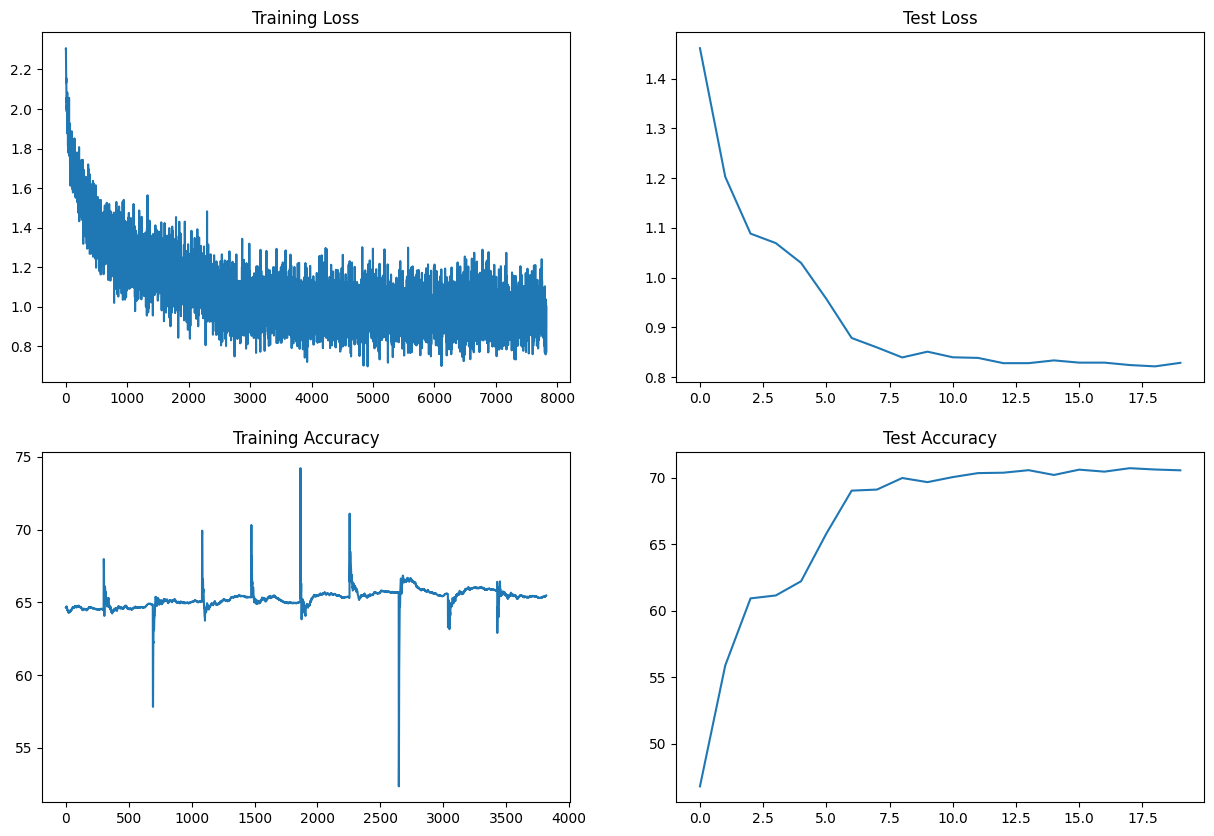

In [32]:
from utils import train_losses, train_acc, test_losses, test_acc
import matplotlib.pyplot as plt
fig, axs = plt.subplots(2,2,figsize=(15,10))
axs[0, 0].plot([train_loss.cpu().detach().numpy() for train_loss in train_losses])
axs[0, 0].set_title("Training Loss")
axs[1, 0].plot(train_acc[4000:])
axs[1, 0].set_title("Training Accuracy")
axs[0, 1].plot(test_losses)
axs[0, 1].set_title("Test Loss")
axs[1, 1].plot(test_acc)
axs[1, 1].set_title("Test Accuracy")

#### Show Misclassified Images

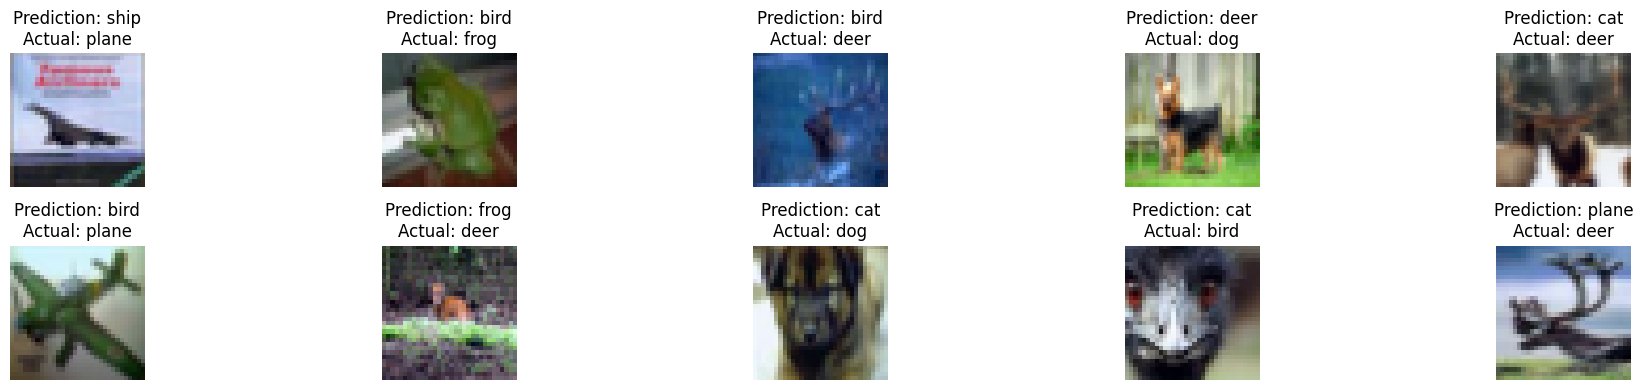

In [42]:
import torch
import numpy as np


def show_misclassified_images(model, test_loader, config):
  model.eval()
  misclass_imgs, misclass_targets, misclass_preds = [], [], []
  with torch.no_grad():
    for images, labels in test_loader:
      images, labels = images.to(config['device']), labels.to(config['device'])
      outputs = model(images)
      pred = outputs.argmax(dim=1, keepdim=True) # get the index of the max log probability
      misclassified_mask = ~(pred == labels.view_as(pred)).cpu().numpy()
      # squeeze
      misclassified_mask = misclassified_mask.squeeze()
      misclass_imgs.extend(images[misclassified_mask])
      misclass_targets.extend(labels.view_as(pred)[misclassified_mask])
      misclass_preds.extend(pred[misclassified_mask])

  return misclass_imgs, misclass_targets, misclass_preds

def plt_misclassified_images(misclass_imgs, misclass_targets, misclass_preds, max_images=10):
  # Determine the number of images to plot (max 10)
  n_images = min(len(misclass_imgs), max_images)
  classes = config['classes']
  fig = plt.figure(figsize=(20,4))
  for i in range(n_images):
    ax = fig.add_subplot(2, 5, i + 1, xticks=[], yticks=[])
    im = misclass_imgs[i].cpu().numpy().transpose((1,2,0))
    label = misclass_targets[i].cpu().numpy().item()
    pred = misclass_preds[i].cpu().numpy().item()

    # Normalize
    im_ = (im - np.min(im)) / (np.max(im) - np.min(im))
    ax.imshow(im_)
    ax.set_title(f"Prediction: {classes[pred]}\nActual: {classes[label]}")
    ax.axis('off')

  plt.tight_layout()
  plt.show()


misclass_imgs, misclass_targets, misclass_preds = show_misclassified_images(model, test_loader, config)
plt_misclassified_images(misclass_imgs, misclass_targets, misclass_preds)
